In [ ]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt

In [ ]:
class Signal:
  def __init__(self, signal): #Signal is a vector of values
    self.signal= signal
    self.N =len(signal)
    self.coeff = [] #Array of tuple, [(Real, Imaginary)]
    self.nyquist = self.N/2; 

  def fourier_transofrm(self, diffFreq=0):
    if(diffFreq==0):
      self.diffFreq=self.N
    complex_sine_wave_t = np.arange(0, self.N)/self.N;  #A vector of time with a samiliar sampling rate to be used when generating each sin 
    self.fr = np.arange(0, self.diffFreq)  #Number of sin signals -with different frequencies- that can be combined to produce the original signal. 
    for i in range(len(self.fr)):
        complex_sine_wave = [cmath.exp(-2*math.pi*1j*self.fr[i]*complex_sine_wave_t[k]) for k in range(len(complex_sine_wave_t))] #generate signal with a specific frequency 
        self.coeff.append(np.dot(complex_sine_wave, self.signal)) #Array of tuple, [(Real, Imaginary) of the those different frequencies]
        #Then we'll get the contribution of each sin in producing the orignial one 
    return self.coeff
    
  def find_frequancy_magnitude_contribution(self):
    #Take the absoluate to get mag
    pts_hz = self.fr[0:int(self.nyquist)]
    normalized_coeff = np.array(coeff)/self.N; 
    self.magnitude = abs(normalized_coeff)*2;
    plt.plot(pts_hz, self.magnitude[0:len(pts_hz)]); 

  
  def reconstruct(self):
    normalized_coeff = np.array(coeff)/self.N; 
    complex_sine_wave_t = np.arange(0, self.N)/self.N;
    reconstructed = np.zeros(self.N);
    for i in range (len(self.fr)):
        reconstructed = reconstructed + [normalized_coeff[i] * cmath.exp(2*cmath.pi*1j*self.fr[i]*complex_sine_wave_t[j]) for j in range(len(complex_sine_wave_t))];

    plt.plot(complex_sine_wave_t, reconstructed)


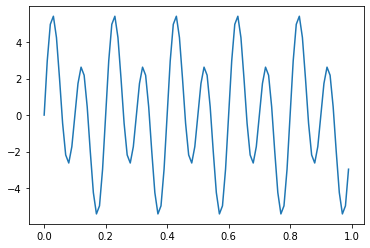

In [ ]:
fs= 100
maximun_time= 1
ti= np.arange(0, maximun_time, 1/fs)
signal_sine1= [2*math.sin((2*math.pi*5*t_i + 0)) for t_i in ti] 
signal_sine2= [4*math.sin((2*math.pi*10*t_i + 0)) for t_i in ti]
all_sig= np.add(np.array(signal_sine1), np.array(signal_sine2))
plt.plot(ti, all_sig)

In [ ]:
fixed_try = Signal(all_sig)
coeff = fixed_try.fourier_transofrm()


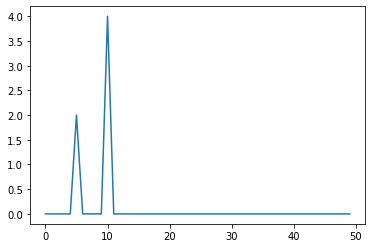

In [ ]:
fixed_try.find_frequancy_magnitude_contribution()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


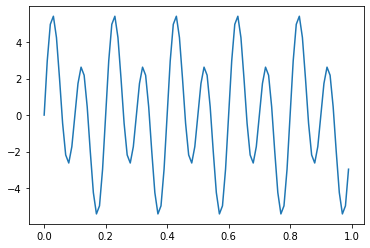

In [ ]:
fixed_try.reconstruct()

In [ ]:
def generate_signal(numOfSignals=1):
    fs= 100
    maximun_time= 1
    ti= np.arange(0, maximun_time, 1/fs)
    signal_sine = np.zeros(len(ti))
    frequencies = np.random.randint(100,  size=numOfSignals)
    magnitudes = np.random.randint(100, size=numOfSignals)
    for i in range(numOfSignals):
      signal_sine += [magnitudes[i]*math.sin((2*math.pi*frequencies[i]*t_i + 0)) for t_i in ti] 
    plt.plot(ti, signal_sine)
    return signal_sine

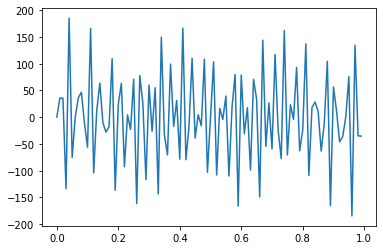

In [ ]:
sig= generate_signal(4)

In [ ]:
trans = Signal(sig)

In [ ]:
coeff = trans.fourier_transofrm()


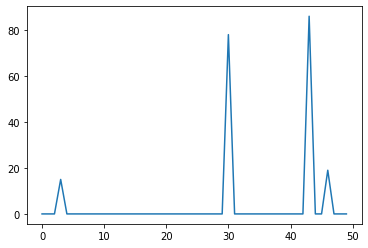

In [ ]:
trans.find_frequancy_magnitude_contribution()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


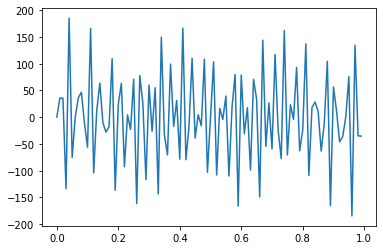

In [ ]:
trans.reconstruct()